<a href="https://colab.research.google.com/github/blasmod/03MAIR----Algoritmos-de-Optimizacion---2020/blob/master/AG2/Blas_Rodriguez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 2 de Algoritmos de Optimización

Blas Rodríguez Lerena

https://colab.research.google.com/drive/1_Qm0JCp8befgsF5wjbTN8ZiuekIV1b7D?usp=sharing

https://github.com/blasmod/03MAIR----Algoritmos-de-Optimizacion---2020/blob/master/AG2/Blas_Rodriguez_AG2.ipynb




In [ ]:
#Viaje por el rio
TARIFAS = [
          [0,5,4,3,999,999,999],
         [999,0,999,2,3,999,11],
         [999,999,0,1,999,4,10],
         [999,999,999,0,5,6,9],
         [999,999,999,999,0,999,4],
         [999,999,999,999,999,0,3],
         [999,999,999,999,999,999,0]
         ]
RUTA = []
PRECIOS = []

def Precios (TARIFAS):

  N = len(TARIFAS[0])

  PRECIOS = [[9999]*N for i in [9999]*N]
  RUTA = [[""]*N for i in [""]*N]
  #print(RUTA)
  
  for i in range(N-1):
    for j in range (i+1,N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      for k in range(i,j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
          RUTA[i][j] = k
          
        PRECIOS[i][j] = MIN
  #print(RUTA)
  
  return (PRECIOS,RUTA)
  
def calcular_ruta(RUTA,desde,hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(RUTA,desde,RUTA[desde][hasta])) + ',' + str(RUTA[desde][hasta])
PRECIOS,RUTA = Precios(TARIFAS)
print ("\n\n La ruta es:")
calcular_ruta(RUTA,0,6)





 La ruta es:


'0,0,2,5'

In [1]:

#Asignar N tareas a N agentes
import itertools
COSTES = [[11,12,18,40],
       [14,15,13,22],
       [11,17,19,23],
       [17,14,20,28]
       ]


def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR



def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()
  
  for s in list(itertools.permutations(range(len(COSTES)))):
    #print(s,valor(s,COSTES))
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print("La mejor solucion es :", mejor_solucion,"con valor:", mejor_valor)

fuerza_bruta(COSTES)

La mejor solucion es : (0, 2, 3, 1) con valor: 61


In [ ]:
#Realizamos comparación de algoritmo de fuerza bruta con el algoritmo de ramificación y poda

#Asignar N tareas a N agentes

import itertools
import numpy as np
import random
from timeit import default_timer as timer

#COSTES = [[11,12,18,40],  #Matriz 4x4
#         [14,15,13,22],
#         [11,17,19,23],
#         [17,14,20,28]]

COSTES = np.random.randint(15, size=(9,9))   #Matriz Aleatoria para comprobar funcionamiento aumentando las dimensiones
print (COSTES)

#Algoritmo de Fuerza Bruta
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR

#valor((0,1,2,3),COSTES)

def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()
  #print(list(itertools.permutations(range(len(COSTES)))))
  for s in list(itertools.permutations(range(len(COSTES)))):
    #print(s,valor(s,COSTES))
    
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print("La mejor solucion para fuerza bruta es: ", mejor_solucion,"con valor:", mejor_valor)
  print("\n")


#Algoritmo Ramificación y Poda

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  
  for i in range (len(S)):
    VALOR +=COSTES[i][S[i]]
    
  #Estimacion
  for i in range(len(COSTES)):
    if i not in S:
      VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
  return VALOR

#Función para ramificar
#Genera tantos hijos como posibilidades haya para el siguiente elemento de la tupla 
# (0,) -> (0,1), (0,2), (0,3)
def crear_hijos (NODO, N):
  
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO + (i,) })
  return HIJOS



def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones (arbol). En cada etapa asignamos un agente (ramas).
#Nodos del grafo {s:(1,2), CI:3,CS:5}
  
  
  print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
  CotaSup = valor (MEJOR_SOLUCION, COSTES)

  NODOS = []
  NODOS.append({'s':(),'ci':CI((),COSTES)})
  iteracion = 0

  while(len(NODOS)>0):
    iteracion+= 1
    nodo_prometedor = [min (NODOS,key=lambda x:x['ci'])][0]['s']

    #Ramificacion
    #Se generan los hijos
    HIJOS = [{'s':x['s'], 'ci':CI(x['s'],COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
    if len(NODO_FINAL)>0:
      if NODO_FINAL[0]['ci']<CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci']< CotaSup]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS = [x for x in NODOS if x['s']!= nodo_prometedor]
  print ("La solucion final es:", MEJOR_SOLUCION, " en ", iteracion, " iteraciones "," para dimension: ", DIMENSION)


start = timer()
fuerza_bruta(COSTES)
end = timer()

start2 = timer()
ramificacion_y_poda(COSTES)
end2 = timer()

time_fbruta = end - start 
time_framif = end2 - start2

print('\nEl tiempo para Algoritmo de fuerza bruta ' + str(time_fbruta))
print('\nEl tiempo para Algoritmo Ramificación y Poda ' + str(time_framif))

[[ 0  0  9  8 11  9  8  6 12]
 [ 1  2  7  9 12  6  2 11  0]
 [ 5  8 13  6  2  1  4  7  5]
 [ 4  8 10  1  9 11 10 10  5]
 [ 6  1  1  2  1 14 14 11 12]
 [10 14  5  1  1  4  9 12 11]
 [14  8 10  2  9  5  5  6 14]
 [ 8 11  6 11  8 12 11  2  3]
 [14 11  4  4  6 13  5 10  4]]
La mejor solucion para fuerza bruta es:  (0, 8, 5, 3, 1, 4, 6, 7, 2) con valor: 15


[[ 0  0  9  8 11  9  8  6 12]
 [ 1  2  7  9 12  6  2 11  0]
 [ 5  8 13  6  2  1  4  7  5]
 [ 4  8 10  1  9 11 10 10  5]
 [ 6  1  1  2  1 14 14 11 12]
 [10 14  5  1  1  4  9 12 11]
 [14  8 10  2  9  5  5  6 14]
 [ 8 11  6 11  8 12 11  2  3]
 [14 11  4  4  6 13  5 10  4]]
La solucion final es: [{'s': (0, 8, 5, 3, 1, 4, 6, 7, 2), 'ci': 15}]  en  171  iteraciones   para dimension:  9

El tiempo para Algoritmo de fuerza bruta 1.7588829880000958

El tiempo para Algoritmo Ramificación y Poda 0.01939057400022648


Hasta dimensión N = 9 el tiempo del algoritmo de fuerza bruta es muy parecido o incluso menor como se puede ver en el ejemplo. Pero cuando subimos a N = 11 el tiempo en el algoritmo de fuerza bruta se dispara de manera exponencial, llegando a los tres minutos en obtener la solución.

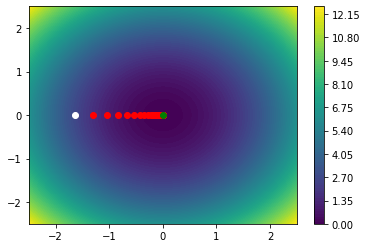

Solucion: [-5.747103296940829e-49, 8.911848731794394e-52] 3.3029275726755963e-97


In [ ]:
#Descenso del gradiente
import math 
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
import random

f = lambda X: X[0]**2+X[1]**2
df = lambda X: [2*X[0], 2*X[1]]   #Funcion Gradiente

#Preparamos los datos para dibujar mapa de niveles de Z

resolucion = 100
rango = 2.5
X = np. linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion, resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio
P = [random.uniform(-2,2),random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA =.1

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0],P[1], "o",c="red")
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:", P , f(P))

  #Definimos la funcion
  #sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2* np.cos(2*X[0] + 1 - np.e**X[1]))

  #Aproximamos el valor del gradiente en un punto por su definicion
def df (PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

